In [1]:
# import packages and data

# import packages and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


data = pd.read_csv('./strokes_ds.csv')

In [2]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_bmi
0,0,67.0,0,1,1,0,0,228.69,36.6,1,1,1.0
1,1,61.0,0,0,1,1,1,202.21,28.1,0,1,0.0
2,0,80.0,0,1,1,0,1,105.92,32.5,0,1,1.0
3,1,49.0,0,0,1,0,0,171.23,34.4,2,1,1.0
4,1,79.0,1,0,1,1,1,174.12,24.0,0,1,1.0


In [120]:
# define functions

def plot_cont_features(dataset, features):
    for i in features:
        stroke = list(dataset[dataset['stroke'] == 1][i])
        non_stroke = list(dataset[dataset['stroke'] == 0][i])
        xmin = min(min(stroke), min(non_stroke))
        xmax = max((max(stroke), max(non_stroke), (max(stroke)+1)))
        width = (xmax - xmin) / 40
        sns.histplot(stroke, color='r', kde=False, bins=np.arange(xmin, xmax, width))
        sns.histplot(non_stroke, color='b', kde=False, bins=np.arange(xmin, xmax, width))
        plt.legend(['stroke', 'non-stroke'])
        plt.title('Overlaid histogram for {}'.format(i))
        plt.show()
        
    
def plot_cat_features(dataset, features, label):
    for i in features: 
        sns.countplot(x=data[i],hue=f"{label}",data=data);
        plt.show()

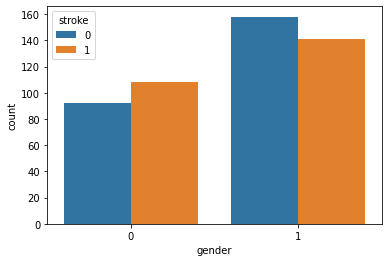

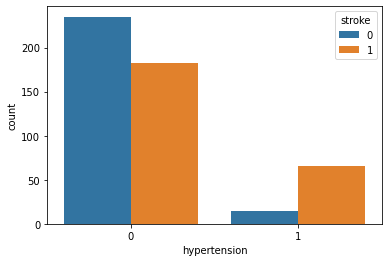

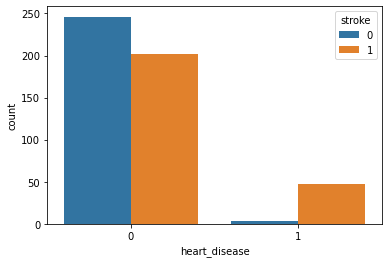

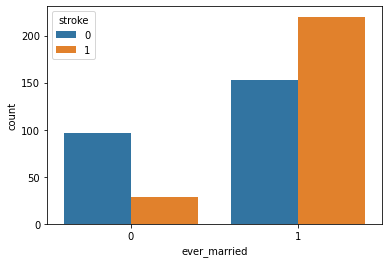

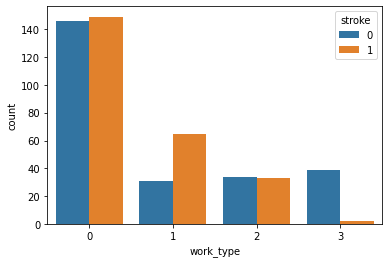

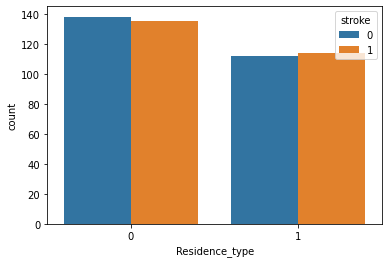

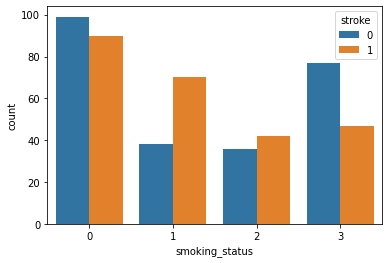

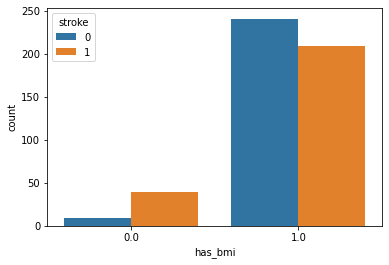

In [121]:
cat_features = ['gender',
                'hypertension',
                'heart_disease',
                'ever_married',
                'work_type',
                'Residence_type',
                'smoking_status',
                'has_bmi'
               ]
plot_cat_features(data, cat_features, 'stroke')

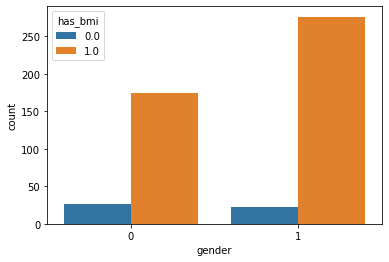

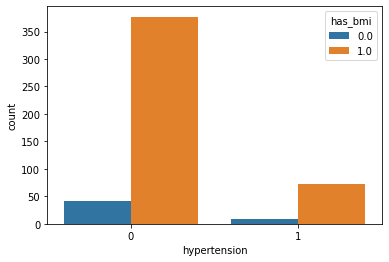

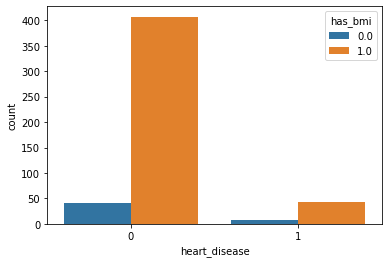

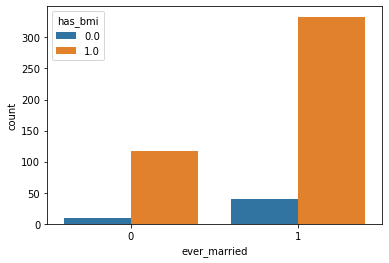

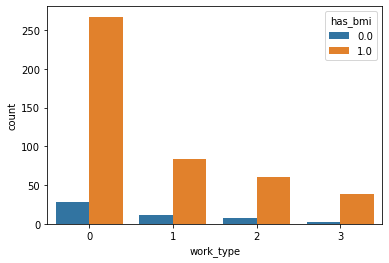

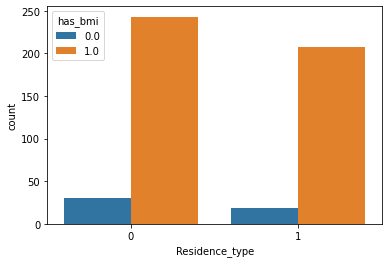

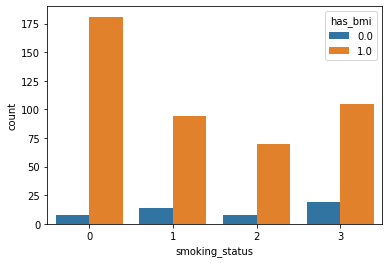

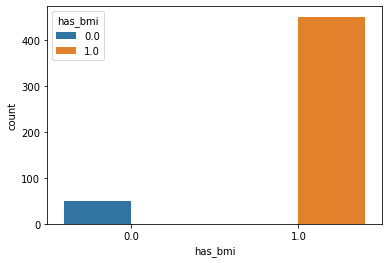

In [122]:
plot_cat_features(data, cat_features, 'has_bmi')

In [124]:
cat_features_df = pd.concat([data[cat_features], data['stroke']], axis=1)
cat_features_df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,has_bmi,stroke
0,0,0,1,1,0,0,1,1.0,1
1,1,0,0,1,1,1,0,0.0,1
2,0,0,1,1,0,1,0,1.0,1
3,1,0,0,1,0,0,2,1.0,1
4,1,1,0,1,1,1,0,1.0,1


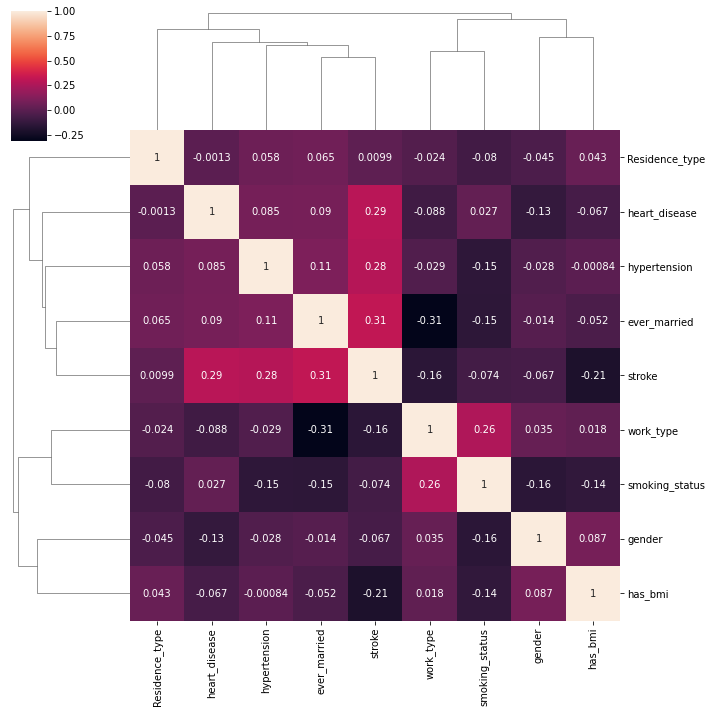

In [126]:
cat_corr_mat = cat_features_df.corr()

sns.clustermap(cat_corr_mat, annot = True)

- residence_type, smoking_status, and gender all have correlations < 10% to stroke. drop to denoise
- ever_married is correlated to age and isn't expected to have a causative effect


In [128]:
# drop features

data_dr = data.drop(['Residence_type', 'ever_married', 'smoking_status', 'gender'], axis=1)
data_dr.head()


,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,has_bmi
0,67.0,0,1,0,228.69,36.6,1,1.0
1,61.0,0,0,1,202.21,28.1,1,0.0
2,80.0,0,1,0,105.92,32.5,1,1.0
3,49.0,0,0,0,171.23,34.4,1,1.0
4,79.0,1,0,1,174.12,24.0,1,1.0


In [131]:
# normalise data
from sklearn import preprocessing

features = data_dr.drop('stroke', axis=1)

scaler = preprocessing.MinMaxScaler()

min_max = scaler.fit_transform(features)

features_minmax = pd.DataFrame(min_max, columns=features.columns)

features_minmax.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,has_bmi
0,0.816357,0.0,1.0,0.000000,0.801265,0.533800,1.0
1,0.742899,0.0,0.0,0.333333,0.679023,0.335664,0.0
2,0.975514,0.0,1.0,0.000000,0.234512,0.438228,1.0
3,0.595984,0.0,0.0,0.000000,0.536008,0.482517,1.0
4,0.963271,1.0,0.0,0.333333,0.549349,0.240093,1.0


In [133]:
from sklearn.model_selection import train_test_split

features = features_minmax
labels = pd.DataFrame(data_dr, columns=['stroke'])

x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=0.4) # training set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=42, test_size=0.5) # splits remaining into val and test

In [137]:
# export datasets
data_dr.to_csv('./data_dr.csv', index=False)


x_train.to_csv('./x_train_features2.csv', header=None, index=False)
x_val.to_csv('./x_val_features2.csv', header=None, index=False)    
x_test.to_csv('./x_test_features2.csv', header=None, index=False)

y_train.to_csv('./y_train_labels2.csv', header=None, index=False)
y_val.to_csv('./y_val_labels2.csv', header=None, index=False)
y_test.to_csv('./y_test_labels2.csv', header=None, index=False)